In [ ]:
#  building a Decision Tree Classifier to predict whether a customer will purchase a product or service based on their-
#  demographic and behavioral data. The model is trained using the **Bank Marketing Dataset** from the UCI Machine Learning


In [2]:
print("SkillCraft Technology")
print("Done By Mohammed Zaidaan Shiraz")

SkillCraft Technology
Done By Mohammed Zaidaan Shiraz


In [3]:
pip install pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.metrics import make_scorer

In [5]:
import pandas as pd
data = pd.read_csv(r"E:\Python Projects\bank.csv", sep=";")
print(data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [6]:
#Data Preprocessing

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

print(data.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  


In [9]:
X = data.drop('y', axis=1)
y = data['y']

In [ ]:
#Split the Data into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Build the Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier(random_state=42)

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = clf.predict(X_test)

In [ ]:
#Evaluate the Model

In [15]:
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8614591009579956

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



In [ ]:
#Visualize the Decision Tree

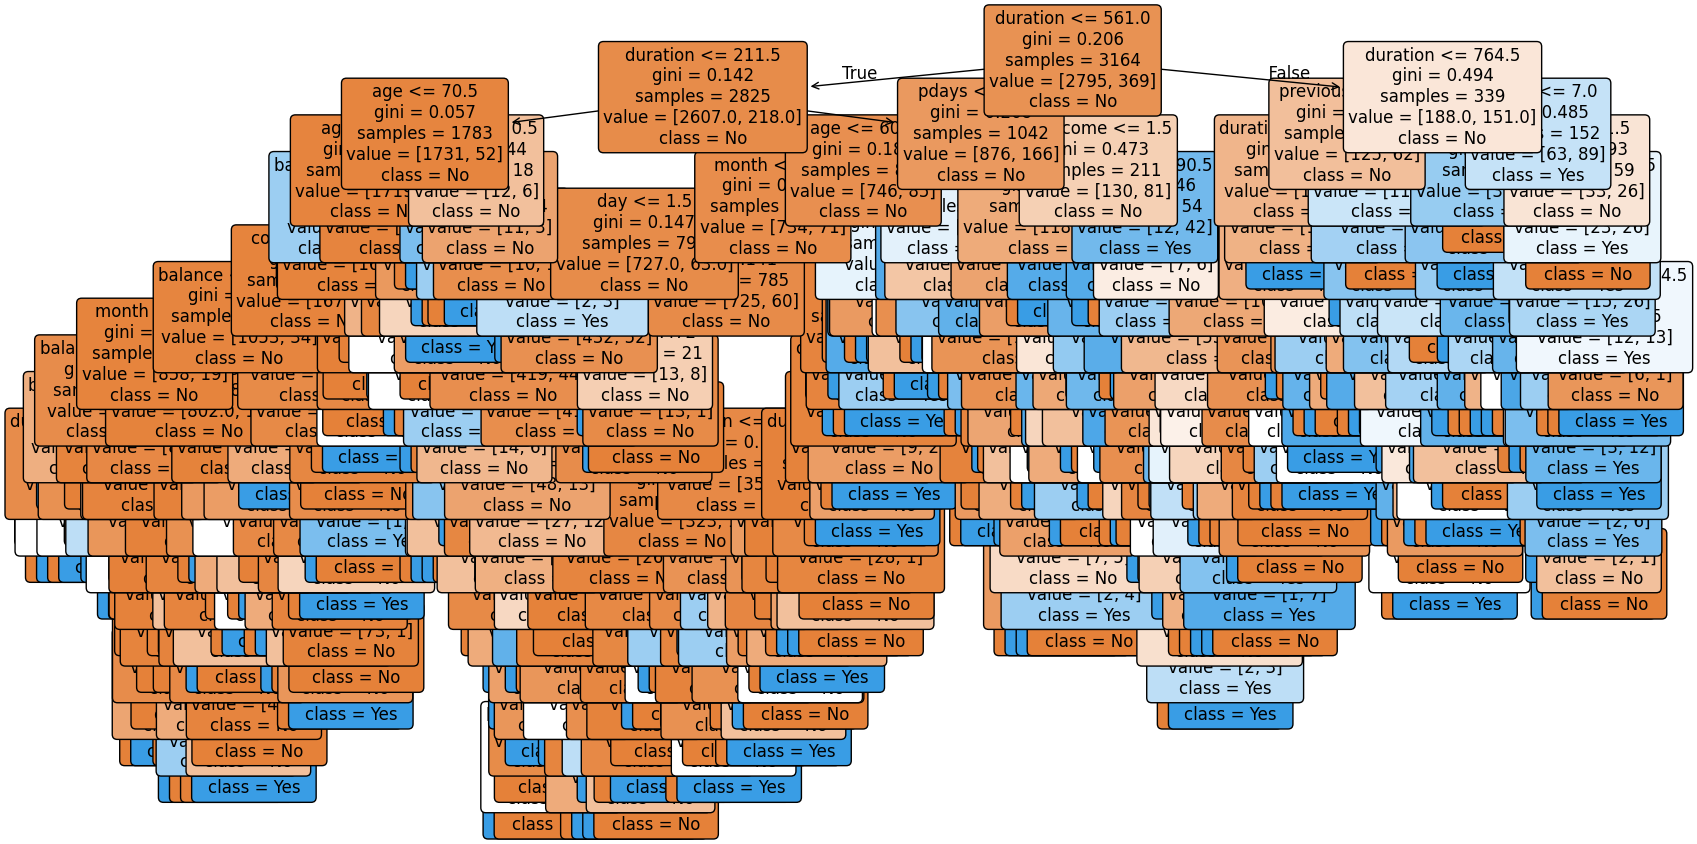

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=12)
plt.show()

In [ ]:
#Hyperparameter Tuning

In [17]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)

In [18]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8614591009579956

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1205
           1       0.38      0.39      0.39       152

    accuracy                           0.86      1357
   macro avg       0.65      0.65      0.65      1357
weighted avg       0.86      0.86      0.86      1357



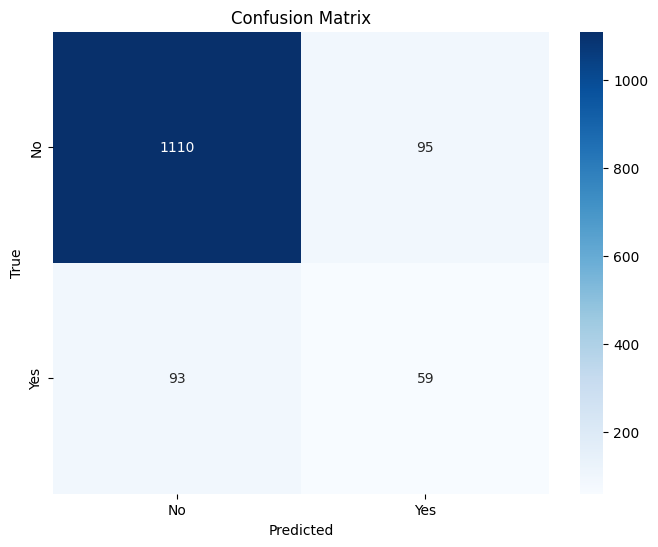

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

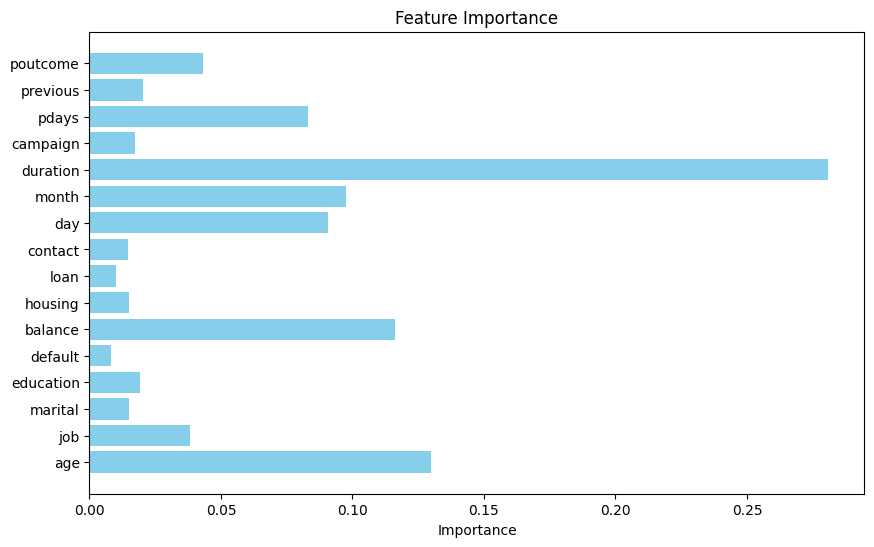

In [22]:
feature_importance = clf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

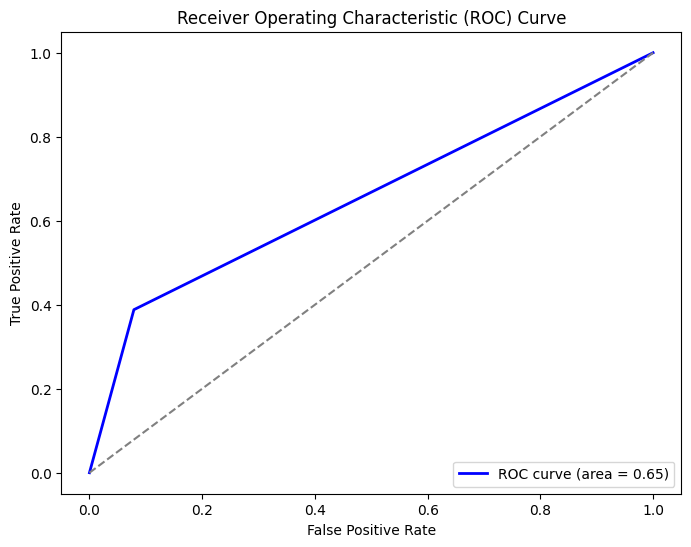

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

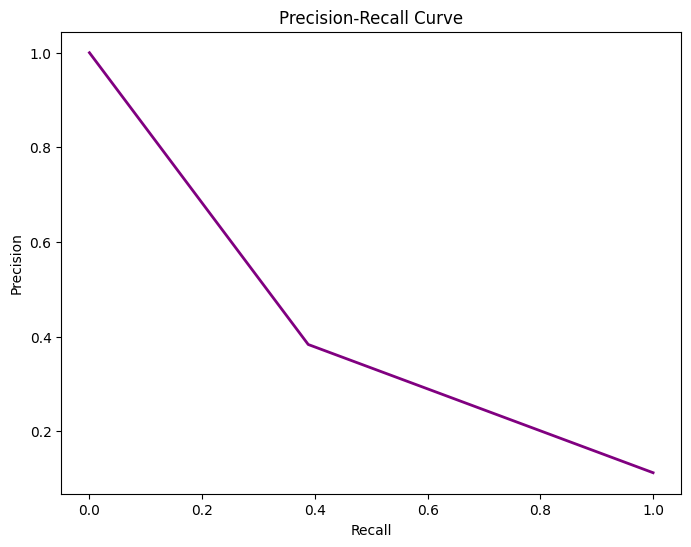

In [24]:
precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [26]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring=make_scorer(accuracy_score))

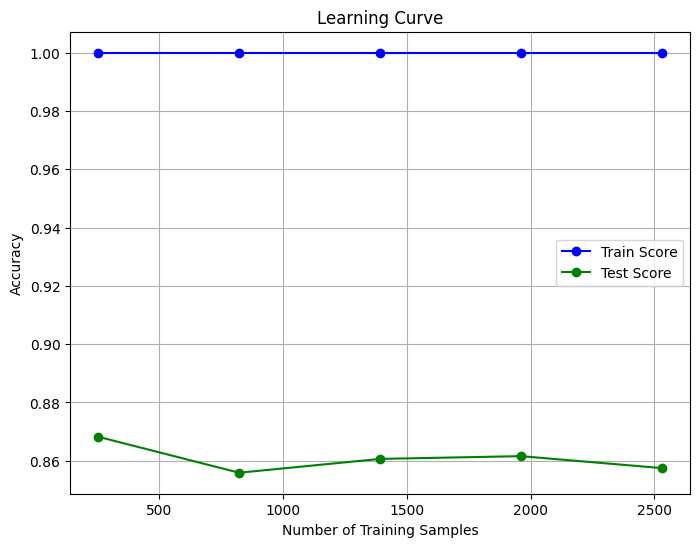

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train Score', color='blue', marker='o')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test Score', color='green', marker='o')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [28]:
max_depth_range = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in max_depth_range:
    clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_depth.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, clf_depth.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, clf_depth.predict(X_test)))

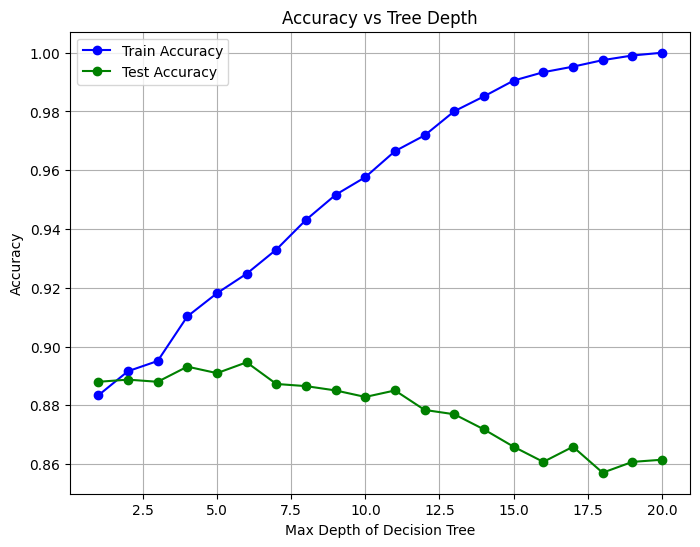

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(max_depth_range, test_accuracies, label='Test Accuracy', color='green', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

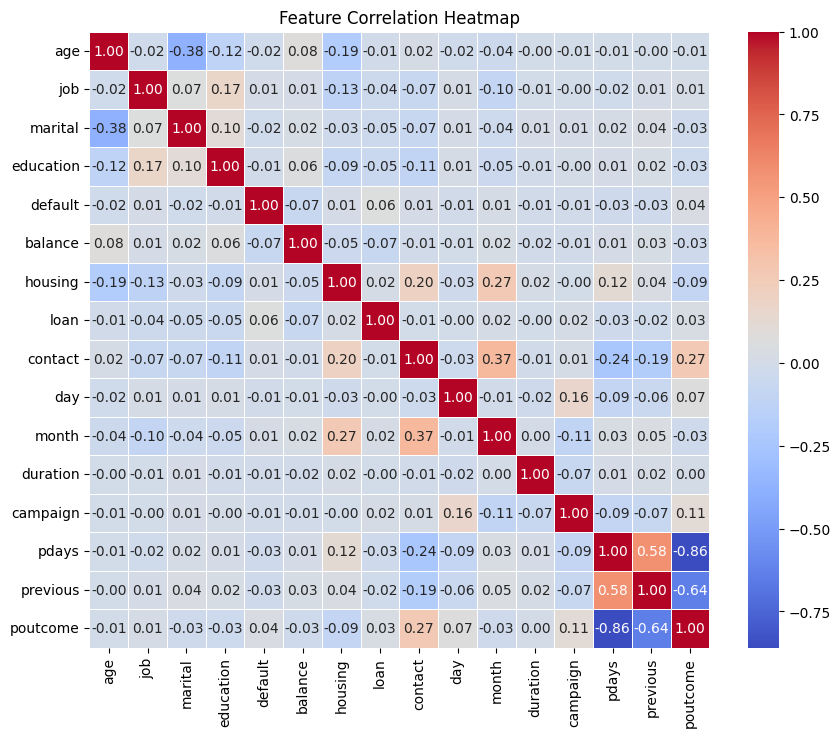

In [30]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()